In [1]:
import os
import re
import numpy as np
import json
from random import shuffle
from PIL import Image
import matplotlib.pyplot as plt


label = json.load(open('D://CISC351//Group_Project_Data//CCRCC.json','r'))

In [2]:
f = open("cohort.csv","r")
all_dict = {} # id: subcategory
allFiles = f.read()
allFiles = allFiles.split('\n')
allFiles.pop(0)

'"_id","Case_ID","Specimen_ID","Slide_ID","Tumor","Topographic_Site","Specimen_Type","Weight","Tumor_Site","Pathology","Tumor_Histological_Type","Tumor_Segment_Acceptable","Percent_Tumor_Nuclei","Percent_Total_Cellularity","Percent_Necrosis","Normal Segment Free of Tumor","HasRadiology","Radiology","Genomics","Proteomics","Genomics_Available","GDC Link","Proteomics_Available","PDC Link","Gender","Age","Vital status at 12months follow up","Vital status at 24months follow up","Ethnicity","Race","Fully Qualified"'

In [3]:
for i in range(len(allFiles)):
    allFiles[i] = allFiles[i].split(',')
    all_dict[allFiles[i][3]] = allFiles[i][6]

In [4]:
imgDir = os.listdir(".//CCRCC_JPEG")

r = re.compile(".*dzi")

newlist = list(filter(r.match,imgDir))
for d in newlist:
    imgDir.remove(d)

print(len(imgDir))

782


In [5]:
def load_training_data():
    train_data = []
    
    k = 1
    #for j in range(len(imgDir)):
    for j in range(2):
        print(k)
        k = k+1
        if (all_dict['"'+imgDir[j].replace('_files','')+'"']=="normal_tissue"):
            label = np.array([1,0])
        else:
            label = np.array([0,1])
        
        for img in os.listdir(".//CCRCC_JPEG//"+imgDir[j]+"//20.0"):
            path = os.path.join(".\\CCRCC_JPEG\\"+imgDir[j]+"\\20.0", img)
            img = Image.open(path)
            train_data.append([np.array(img), label])
            
    
    shuffle(train_data)
    return train_data

In [73]:
def load_test_data():
    train_data = []
    
    k = 1
    #for j in range(len(imgDir)):
    for j in range(101,103):
        print(j)
        # Checking label. Didn't like the string written as "normal_tissue" for whatever reason
        if (all_dict['"'+imgDir[j].replace('_files','')+'"']==all_dict['"'+imgDir[1].replace('_files','')+'"']):
            label = np.array([1,0])
        else:
            label = np.array([0,1])
        
        for img in os.listdir(".//CCRCC_JPEG//"+imgDir[j]+"//20.0"):
            path = os.path.join(".\\CCRCC_JPEG\\"+imgDir[j]+"\\20.0", img)
            img = Image.open(path)
            train_data.append([np.array(img), label])
        
        print(label)
    
    shuffle(train_data)
    return train_data

In [65]:
print(all_dict['"'+imgDir[103].replace('_files','')+'"'])

"normal_tissue"


<class 'str'>


1
2


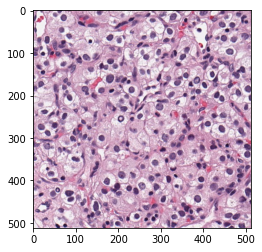

In [6]:
# function creates tensors that are too large for memory. Need to figure out another way to build the tensors. Number of images per directory found in the next cell.
im = load_training_data()
plt.imshow(im[0][0])

In [7]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization

model = Sequential()

In [8]:
img_height = 512
img_width = 512

model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(img_height,img_width, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation = 'softmax'))

In [9]:
trainImages = np.array([i[0] for i in im]).reshape(-1, img_height, img_width, 3)
trainLabels = np.array([i[1] for i in im],dtype = "object") 

In [10]:
trainImages = np.asarray(trainImages).astype(np.int)
trainLabels = np.asarray(trainLabels).astype(np.int)

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [12]:
model.fit(trainImages, trainLabels, batch_size = 1, epochs = 3, verbose = 1)

Epoch 1/3
1026/1026 [==============================] - 1679s 2s/step - loss: 0.0016 - accuracy: 1.0000
Epoch 2/3
1026/1026 [==============================] - 1746s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/3
1026/1026 [==============================] - 1710s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000


In [74]:
im = load_test_data()

101
[1 0]
102
[0 1]


In [78]:
print(im[101][1])

[0 1]


In [75]:
trainImages = np.array([i[0] for i in im]).reshape(-1, img_height, img_width, 3)
trainLabels = np.array([i[1] for i in im],dtype = "object") 
trainImages = np.asarray(trainImages).astype(np.int)
trainLabels = np.asarray(trainLabels).astype(np.int)
print(trainImages.shape)

(113, 512, 512, 3)


In [76]:
print(trainLabels)

[[0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]]


In [24]:
loss, acc = model.evaluate(trainImages, trainLabels, verbose = 0)
print(acc * 100)

100.0
